<a href="https://colab.research.google.com/github/kridtapon/MACD-Optimization/blob/main/MACD_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.4/527.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninst

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

def calculate_macd(df, fast=12, slow=26, signal=9):
    """Calculate MACD line and Signal line."""
    df['MACD_Line'] = df['Close'].ewm(span=fast, adjust=False).mean() - df['Close'].ewm(span=slow, adjust=False).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=signal, adjust=False).mean()
    return df


# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2014-12-19'
end_date = '2024-12-19'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Calculate MACD
df = calculate_macd(df, fast=13, slow=23, signal=14)

# Define entry signal with Fibonacci and MACD confirmation
df['Entry'] = (
    (df['MACD_Line'] > df['MACD_Signal'])  # MACD bullish crossover
)

# Define exit signal for a Buy Trade
df['Exit'] = (
    (df['MACD_Line'] < df['MACD_Signal'])  # MACD bearish crossover
)

# Convert signals to boolean arrays
entries = df['Entry'].to_numpy()
exits = df['Exit'].to_numpy()

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=entries,
    exits=exits,
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                                2014-12-19 00:00:00
End                                  2024-12-18 00:00:00
Period                                3653 days 00:00:00
Start Value                                     100000.0
End Value                                76639809.828602
Total Return [%]                            76539.809829
Benchmark Return [%]                        31375.144375
Max Gross Exposure [%]                             100.0
Total Fees Paid                           3443528.930841
Max Drawdown [%]                               61.527558
Max Drawdown Duration                 1106 days 00:00:00
Total Trades                                          93
Total Closed Trades                                   93
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                    54.83871
Best Trade [%]                                104.688137
Worst Trade [%]                

[*********************100%***********************]  1 of 1 completed


Best Parameters: Fast=13.0, Slow=23.0, Signal=14.0
Best Total Return [%]: 76539.80982860211


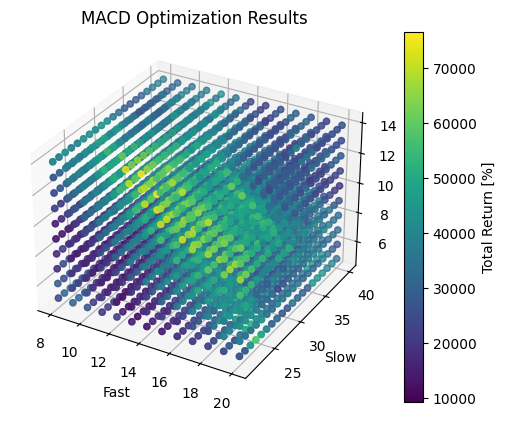

Start                                2014-12-19 00:00:00
End                                  2024-12-18 00:00:00
Period                                3653 days 00:00:00
Start Value                                     100000.0
End Value                                76639809.828602
Total Return [%]                            76539.809829
Benchmark Return [%]                        31375.144375
Max Gross Exposure [%]                             100.0
Total Fees Paid                           3443528.930841
Max Drawdown [%]                               61.527558
Max Drawdown Duration                 1106 days 00:00:00
Total Trades                                          93
Total Closed Trades                                   93
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                    54.83871
Best Trade [%]                                104.688137
Worst Trade [%]                

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_macd(df, fast=12, slow=26, signal=9):
    """Calculate MACD line and Signal line."""
    df['MACD_Line'] = df['Close'].ewm(span=fast, adjust=False).mean() - df['Close'].ewm(span=slow, adjust=False).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=signal, adjust=False).mean()
    return df

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2014-12-19'
end_date = '2024-12-19'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Create a grid of parameter values
fast_values = range(8, 21)  # Fast MACD from 1 to 20
slow_values = range(21, 41)  # Slow MACD from 21 to 40
signal_values = range(5, 15)  # Signal from 5 to 15

# Initialize a list to store results
results = []

# Iterate through all combinations of parameters
for fast, slow, signal in product(fast_values, slow_values, signal_values):
    df_temp = df.copy()
    df_temp = calculate_macd(df_temp, fast=fast, slow=slow, signal=signal)

    # Define entry and exit signals
    df_temp['Entry'] = (df_temp['MACD_Line'] > df_temp['MACD_Signal'])  # MACD bullish crossover
    df_temp['Exit'] = (df_temp['MACD_Line'] < df_temp['MACD_Signal'])  # MACD bearish crossover

    # Convert signals to boolean arrays
    entries = df_temp['Entry'].to_numpy()
    exits = df_temp['Exit'].to_numpy()

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_temp['Close'],
        entries=entries,
        exits=exits,
        init_cash=100_000,
        fees=0.001
    )

    # Store the total return and parameters for plotting
    total_return = portfolio.stats()['Total Return [%]']
    results.append((fast, slow, signal, total_return))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Fast', 'Slow', 'Signal', 'Total Return'])

# Find the best parameters
best_params = results_df.loc[results_df['Total Return'].idxmax()]
print(f"Best Parameters: Fast={best_params['Fast']}, Slow={best_params['Slow']}, Signal={best_params['Signal']}")
print(f"Best Total Return [%]: {best_params['Total Return']}")

# Plotting the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot for the results
ax.scatter(results_df['Fast'], results_df['Slow'], results_df['Signal'], c=results_df['Total Return'], cmap='viridis')

# Labels and title
ax.set_xlabel('Fast')
ax.set_ylabel('Slow')
ax.set_zlabel('Signal')
ax.set_title('MACD Optimization Results')

# Show color bar
fig.colorbar(ax.scatter(results_df['Fast'], results_df['Slow'], results_df['Signal'], c=results_df['Total Return'], cmap='viridis'), ax=ax, label='Total Return [%]')

plt.show()

# Backtest with the best parameters
df_best = df.copy()
df_best = calculate_macd(df_best, fast=best_params['Fast'], slow=best_params['Slow'], signal=best_params['Signal'])

# Define entry and exit signals
df_best['Entry'] = (df_best['MACD_Line'] > df_best['MACD_Signal'])
df_best['Exit'] = (df_best['MACD_Line'] < df_best['MACD_Signal'])

# Convert signals to boolean arrays
entries = df_best['Entry'].to_numpy()
exits = df_best['Exit'].to_numpy()

# Backtest using vectorbt
portfolio_best = vbt.Portfolio.from_signals(
    close=df_best['Close'],
    entries=entries,
    exits=exits,
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio_best.stats())

# Plot equity curve
portfolio_best.plot().show()